In [250]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [251]:
# Set the file paths to the CSV
ella_csv_path = Path("Ella Database.csv")

In [252]:
# Read CSV file & Sort
mrkt_sp_df = pd.read_csv(ella_csv_path, index_col="Period", header=1)
mrkt_sp_df.drop(columns = ['Entity Sale'], inplace = True)
mrkt_sp_df = mrkt_sp_df.sort_index()
mrkt_sp_df.head()

,# of Transactions,% of Search,Sales Volume,Market Sale Price/SF,Transaction Sale Price/SF,Sales Volume per SF,CBD,Urban,Suburban,Individual Sale,Portfolio Sale,Condo Sale
Period,,,,,,,,,,,,
2012-03-31,45,1.90%,"$766,682,820",0,0,0,0,0,0,0,0,0
2012-06-30,42,1.80%,"$1,501,093,561",0,0,0,0,0,0,0,0,0
2012-09-30,32,1.40%,"$628,663,895",0,0,0,0,0,0,0,0,0
2012-12-31,24,1.00%,"$1,002,317,373",0,0,0,0,0,0,0,0,0
2013-03-31,43,1.80%,"$80,604,508",$290,$218,"$174,156,965",$357,$280,$238,$263,$210,$120


In [253]:
# Show Column names
mrkt_sp_df.columns

Index(['# of Transactions', '% of Search', 'Sales Volume',
       'Market Sale Price/SF', 'Transaction Sale Price/SF',
       'Sales Volume per SF', 'CBD', 'Urban', 'Suburban', 'Individual Sale',
       'Portfolio Sale', 'Condo Sale'],
      dtype='object')

In [254]:
# Change data types
mrkt_sp_df['% of Search'] = mrkt_sp_df['% of Search'].replace({'%':''}, regex = True).astype(float)

cols_to_clean = 'Sales Volume', 'Market Sale Price/SF', 'Transaction Sale Price/SF', 'Sales Volume per SF', 'CBD', 'Urban', 'Suburban', 'Individual Sale', 'Portfolio Sale', 'Condo Sale'
for col in cols_to_clean:
    mrkt_sp_df[col] = mrkt_sp_df[col].map(lambda x: x.replace('$',''))

for col in cols_to_clean:
    mrkt_sp_df[col] = [x.replace(',', '') if ',' in x else x for x in mrkt_sp_df[col]]


mrkt_sp_df['Sales Volume'] = mrkt_sp_df['Sales Volume'].astype(int)
mrkt_sp_df['Market Sale Price/SF'] = mrkt_sp_df['Market Sale Price/SF'].astype(int)
mrkt_sp_df['Transaction Sale Price/SF'] = mrkt_sp_df['Transaction Sale Price/SF'].astype(int)
mrkt_sp_df['Sales Volume per SF'] = mrkt_sp_df['Sales Volume per SF'].astype(int)
mrkt_sp_df['CBD'] = mrkt_sp_df['CBD'].astype(int)
mrkt_sp_df['Urban'] = mrkt_sp_df['Urban'].astype(int)
mrkt_sp_df['Suburban'] = mrkt_sp_df['Suburban'].astype(int)
mrkt_sp_df['Individual Sale'] = mrkt_sp_df['Individual Sale'].astype(int)
mrkt_sp_df['Portfolio Sale'] = mrkt_sp_df['Portfolio Sale'].astype(int)
mrkt_sp_df['Condo Sale'] = mrkt_sp_df['Condo Sale'].astype(int)
    
mrkt_sp_df.dtypes

# of Transactions              int64
% of Search                  float64
Sales Volume                   int64
Market Sale Price/SF           int64
Transaction Sale Price/SF      int64
Sales Volume per SF            int64
CBD                            int64
Urban                          int64
Suburban                       int64
Individual Sale                int64
Portfolio Sale                 int64
Condo Sale                     int64
dtype: object

In [255]:
# Show Main Dataframe
mrkt_sp_df.head()

,# of Transactions,% of Search,Sales Volume,Market Sale Price/SF,Transaction Sale Price/SF,Sales Volume per SF,CBD,Urban,Suburban,Individual Sale,Portfolio Sale,Condo Sale
Period,,,,,,,,,,,,
2012-03-31,45,1.9,766682820,0,0,0,0,0,0,0,0,0
2012-06-30,42,1.8,1501093561,0,0,0,0,0,0,0,0,0
2012-09-30,32,1.4,628663895,0,0,0,0,0,0,0,0,0
2012-12-31,24,1.0,1002317373,0,0,0,0,0,0,0,0,0
2013-03-31,43,1.8,80604508,290,218,174156965,357,280,238,263,210,120


In [277]:
# Extract Market Sale Price and Transaction Price per SF
MSP_TSP_SF = mrkt_sp_df[['Market Sale Price/SF', 'Transaction Sale Price/SF']]
MSP_TSP_SF.head()

,Market Sale Price/SF,Transaction Sale Price/SF
Period,,
2012-03-31,0,0
2012-06-30,0,0
2012-09-30,0,0
2012-12-31,0,0
2013-03-31,290,218


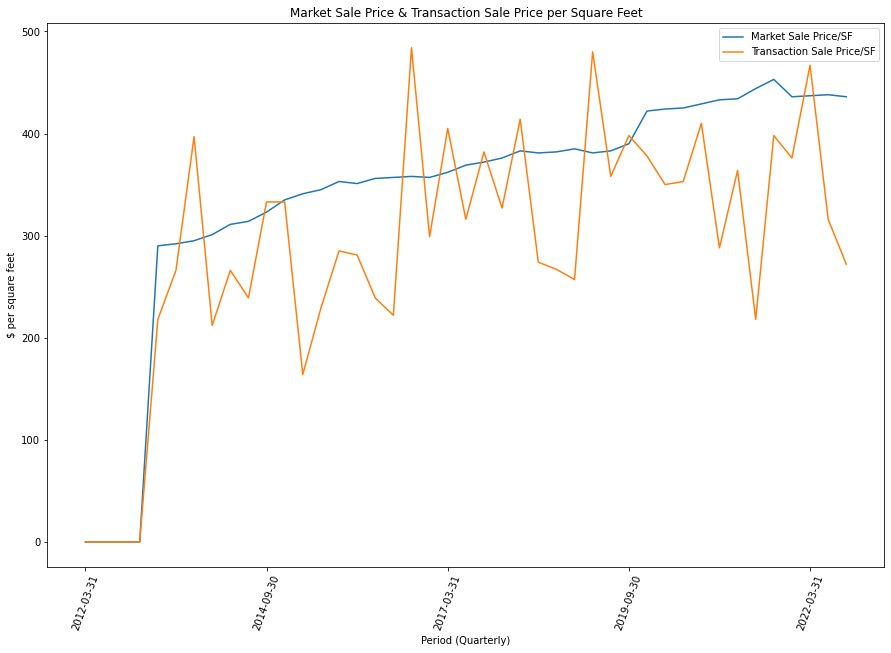

In [288]:
# Plot Market Sale Price and Transaction Price per SF
MSP_TSP_SF.plot.line(figsize =(15,10), rot=70)
plt.title("Market Sale Price & Transaction Sale Price per Square Feet")
plt.xlabel("Period (Quarterly)")
plt.ylabel("$ per square feet")
plt.show()

#plt.savefig('Market Sale Price & Transaction Sale Price per Square Feet')

In [267]:
# Estract Sales Volume per SF
Sales_Vol_SF = mrkt_sp_df[['Sales Volume per SF']]
Sales_Vol_SF.head()

,Sales Volume per SF
Period,
2012-03-31,0
2012-06-30,0
2012-09-30,0
2012-12-31,0
2013-03-31,174156965


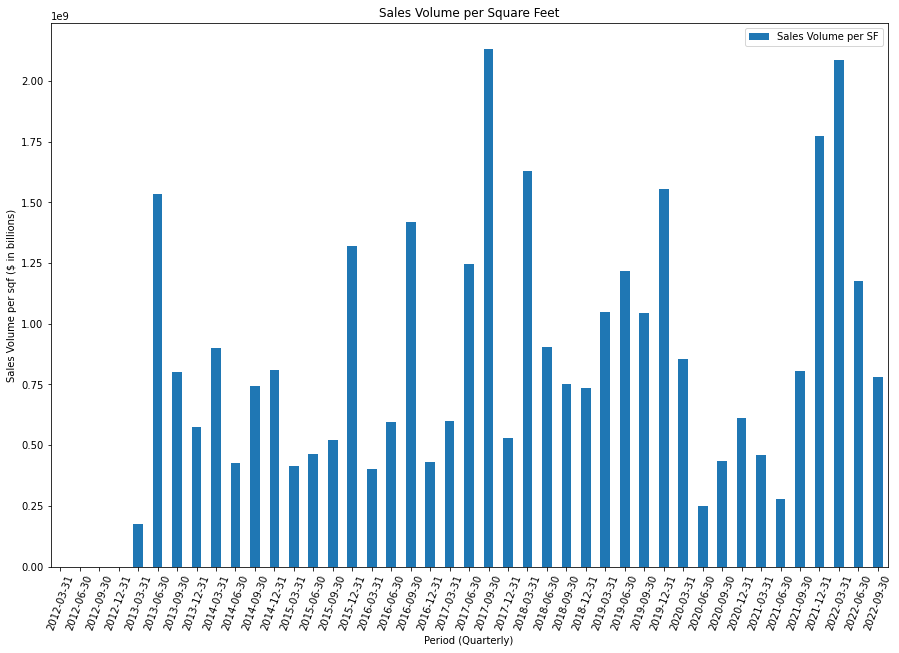

<Figure size 432x288 with 0 Axes>

In [284]:
# Plot Sales Volume per SF
Sales_Vol_SF.plot.bar(figsize =(15,10), rot=70)
plt.title("Sales Volume per Square Feet")
plt.xlabel("Period (Quarterly)")
plt.ylabel("Sales Volume per sqf ($ in billions)")
plt.show()

plt.savefig('Sales Volume per Square Feet')

In [228]:
# Extract Market Sale Price per SF by Location Type
MSP_SF_LOC = mrkt_sp_df[['CBD', 'Urban', 'Suburban']]
MSP_SF_LOC.head()

,CBD,Urban,Suburban
Period,,,
2012-03-31,0,0,0
2012-06-30,0,0,0
2012-09-30,0,0,0
2012-12-31,0,0,0
2013-03-31,357,280,238


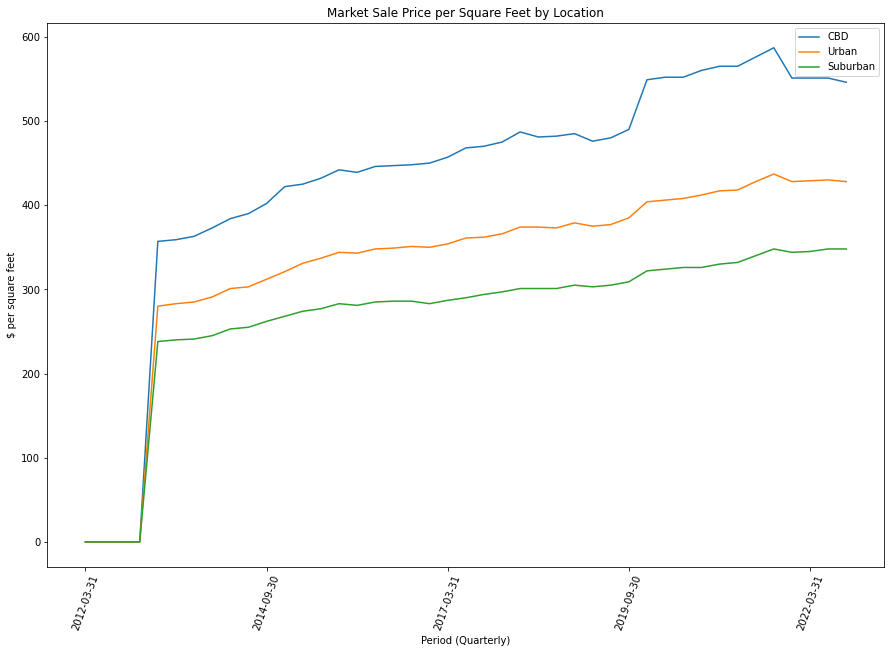

<Figure size 432x288 with 0 Axes>

In [285]:
# Create Graph
MSP_SF_LOC.plot.line(figsize =(15,10), rot=70)
plt.title("Market Sale Price per Square Feet by Location")
plt.xlabel("Period (Quarterly)")
plt.ylabel("$ per square feet")
plt.show()

plt.savefig('Market Sale Price per Square Feet by Location')

In [230]:
# Extract Market Sale Price per SF by Transaction Type
MSP_SF_TRANSACTION = mrkt_sp_df[['Individual Sale','Portfolio Sale', 'Condo Sale']]
MSP_SF_TRANSACTION.head()

,Individual Sale,Portfolio Sale,Condo Sale
Period,,,
2012-03-31,0,0,0
2012-06-30,0,0,0
2012-09-30,0,0,0
2012-12-31,0,0,0
2013-03-31,263,210,120


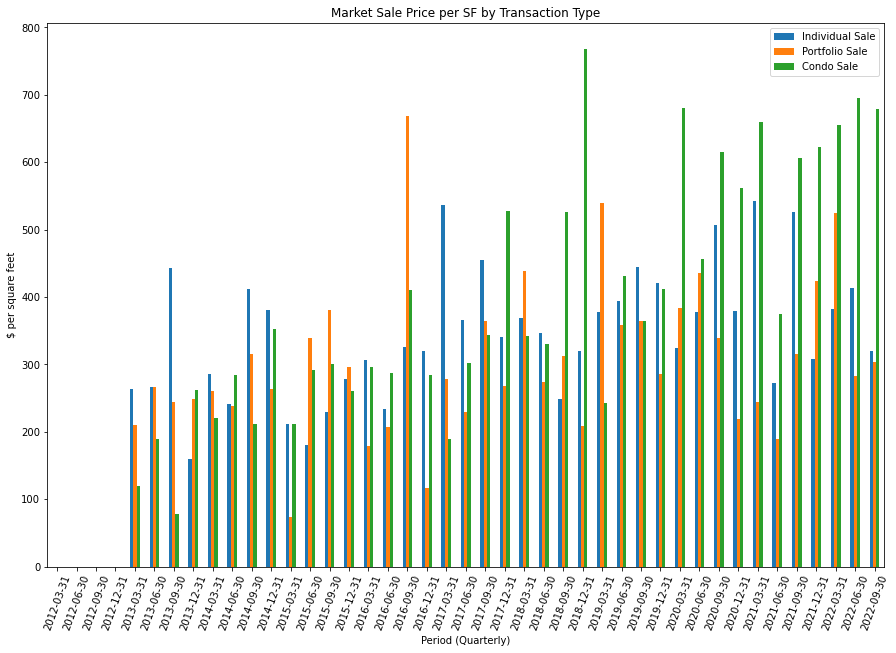

In [291]:
# Plot Market Sale Price per SF by Transaction Type
MSP_SF_TRANSACTION.plot.bar(figsize =(15,10), rot=70)
plt.title("Market Sale Price per SF by Transaction Type")
plt.xlabel("Period (Quarterly)")
plt.ylabel("$ per square feet")
plt.show()

#plt.savefig('Market Sale Price per SF by Transaction Type')